In [4]:
import pandas as pd
import nltk
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from unidecode import unidecode
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from gensim.models import Word2Vec
from gensim.similarities import WmdSimilarity
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True
...,...,...,...,...,...,...
2137,2137,delta air lines inc com,delta air lines inc dela new,DAL,DAL,True
2138,2138,cognizant tech solutns a,cognizant tech solutions corp,CTSH,CTSH,True
2139,2139,pimco investment grade corporate bond fund - c...,fid conservative income bond fund,PBDAX,FCONX,False
2140,2140,eli lilly & co com,lilly eli &co com npv,LLY,LLY,True


In [7]:
df_test

,test_id,description_x,description_y,same_security
0,0,semtech corp,semtech corporation,NaN
1,1,vanguard mid cap index,vanguard midcap index - a,NaN
2,2,spdr gold trust gold shares,spdr gold trust spdr gold shares,NaN
3,3,vanguard total bond index adm,vanguard total bond market index,NaN
4,4,oakmark international fund class i,oakmark international cl i,NaN
...,...,...,...,...
511,511,at&t inc com isin #us00206r1023 sedol #2831811,franklin res inc com isin #us8 sedol #2350684,NaN
512,512,vanguard total international bond index etf,vanguard total international bond et,NaN
513,513,wisdomtree japan hedged equity -,wisdomtree japan hedged eq,NaN
514,514,templeton global bond fund advisor class,templeton glbal bond adv,NaN


In [7]:
# list of stop words and punctuation in the English language
STOP_WORDS = stopwords.words('english') + list(string.punctuation)
lemmatizer = WordNetLemmatizer()

def pre_process(corpus):
    '''pre processes corpus(input text) before processing'''
    # uniform case
    corpus = corpus.lower()
    # remove html tags
    corpus = BeautifulSoup(corpus, 'lxml').get_text()
    # transate non ascii characters to ascii
    corpus = unidecode(corpus)
    # tokenize words
    corpus = word_tokenize(corpus)
    # remove stop words
    corpus = [i for i in corpus if i not in STOP_WORDS and ["br","li"]]
    # lemmatize
    for index, word in enumerate(corpus):
        corpus[index] = lemmatizer.lemmatize(word)
    
        
    return " ".join(corpus)

In [8]:
df_train['description_x'] = df_train['description_x'].apply(lambda x: pre_process(x))
df_train['description_y'] = df_train['description_y'].apply(lambda x: pre_process(x))
df_test['description_x'] = df_train['description_x'].apply(lambda x: pre_process(x))
df_test['description_y'] = df_train['description_y'].apply(lambda x: pre_process(x))

In [20]:
df_train

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin us4 sedol b7...,duke energy corp new com new isin us26441c2044...,DUK,DUK,True
4,4,visa inc class,visa inc,V,V,True
...,...,...,...,...,...,...
2137,2137,delta air line inc com,delta air line inc dela new,DAL,DAL,True
2138,2138,cognizant tech solutns,cognizant tech solution corp,CTSH,CTSH,True
2139,2139,pimco investment grade corporate bond fund class,fid conservative income bond fund,PBDAX,FCONX,False
2140,2140,eli lilly co com,lilly eli co com npv,LLY,LLY,True


In [21]:
df_test

,test_id,description_x,description_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,NaN
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,NaN
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,NaN
3,3,duke energy corp new com new isin us4 sedol b7...,duke energy corp new com new isin us26441c2044...,NaN
4,4,visa inc class,visa inc,NaN
...,...,...,...,...
511,511,walt disney co hldg co div 1.420,walt disney co com,NaN
512,512,accenture ltd ord,accenture,NaN
513,513,phillips 66 com,phillips 66,NaN
514,514,aqr managed future strategy r6,aqr fds aqmixmanaged future strategy fd,NaN


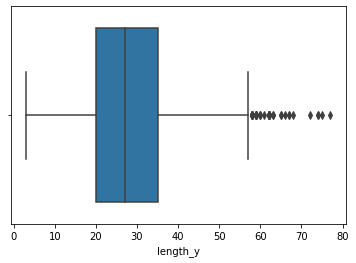

In [9]:
df_train['length_x'] = df_train['description_x'].apply(lambda x: len(x))
df_train['length_y'] = df_train['description_y'].apply(lambda x: len(x))
df_test['length_y'] = df_test['description_y'].apply(lambda x: len(x))
df_test['length_y'] = df_test['description_y'].apply(lambda x: len(x))
import seaborn as sns
sns.boxplot(x=df_train['length_y'])

(-0.5, 1599.5, 799.5, -0.5)

Text(0.5, 1.0, 'Top 100 Most Common Words')

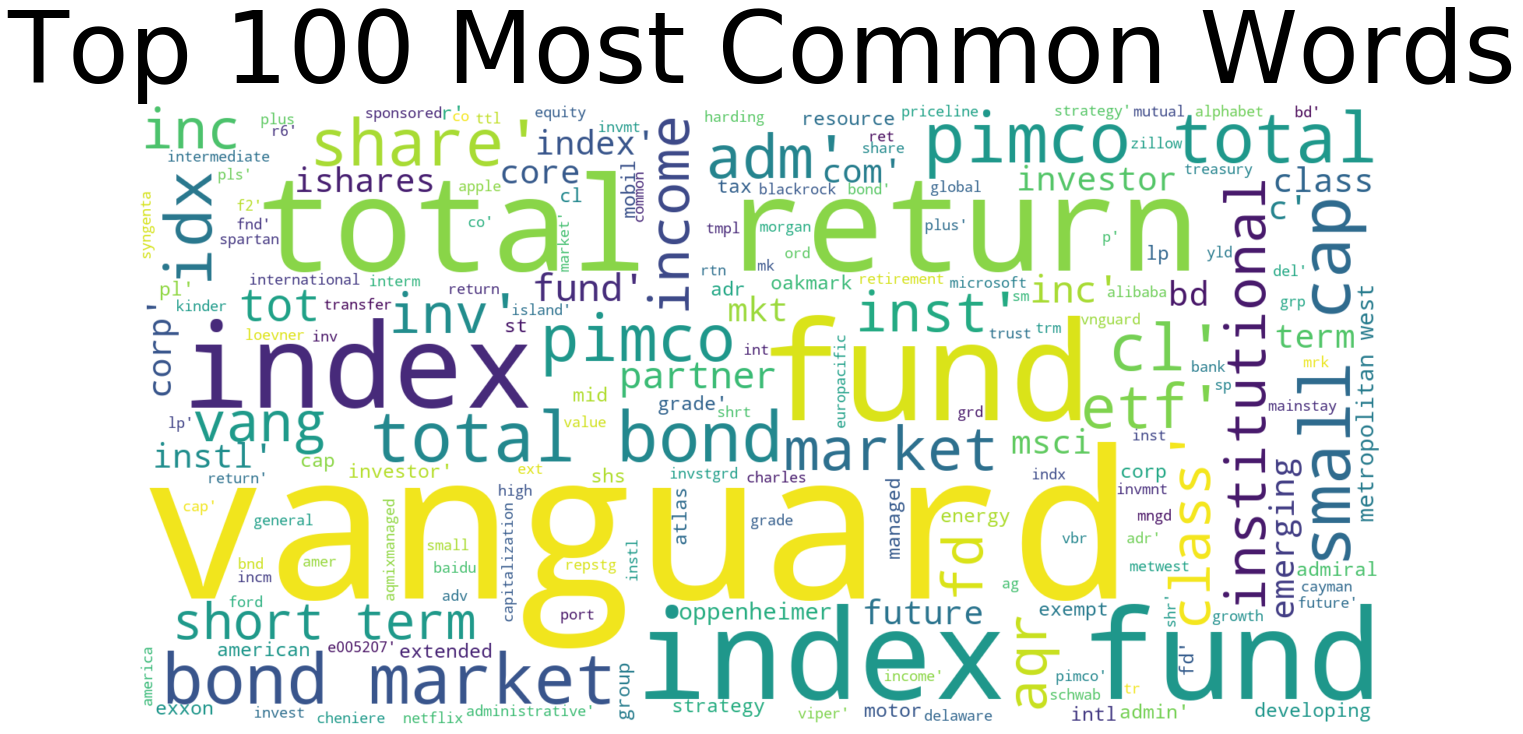

In [10]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pylab as plt

corpus = []
for i,j in df_train['description_y'].iteritems():
    corpus.append(j)
mostcommon = FreqDist(corpus).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df_train['description_x'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix.T

# create vocabulary using uni, bi and tri grams

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# fit and transform TF-IDF

tfidf_vectorizer.fit(corpus)
feature_vectors = tfidf_vectorizer.transform(corpus)
feature_vectors

,0,1,2,3,4,5,6,7,8,9,...,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adm,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
admiral,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
adr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
american,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trust,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
value,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
vang,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vanguard,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

<2142x7111 sparse matrix of type '<class 'numpy.float64'>'
	with 23714 stored elements in Compressed Sparse Row format>

In [12]:
def cal_correct(df_temp, col, threshold):
    df_temp[col + '_predicted'] = df_temp[col] >= threshold
    df_temp[col + '_correct'] = df_temp[col + '_predicted'] == df_result['same_security']
    
    df_group = df_temp.groupby(df_temp[col + '_correct']).size().reset_index()
    df_group.columns = ['correct', 'cnt']

    plt.pie(df_group['cnt'].tolist(), labels=df_group['correct'].tolist(), autopct='%1.1f%%')
    plt.show()    
thresholds = [0.4, 0.5, 0.6]

In [13]:
import re
from sklearn.feature_extraction import text
vectorizer = text.TfidfVectorizer()

def cosine_sim(test1, test2):
    tfidf = vectorizer.fit_transform([test1, test2])
    result = ((tfidf * tfidf.T).A)[0,1]
    return result
    
def cosine_sim_df(df_data):
    col1 = 'description_x'
    col2 = 'description_y'
    df_data[col1] = df_data[col1].str.replace(r'\d', '')
    df_data[col2] = df_data[col2].str.replace(r'\d', '')
    
    df_data['cos_sim'] = 0
    df_data['cos_sim'] = df_data.apply(
        lambda x: cosine_sim(x[col1], x[col2]), axis=1)
    return df_data

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security,length_x,length_y,cos_sim
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True,30,27,0.431613
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True,35,55,0.527072
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False,28,34,0.580333


threshold: 0.4


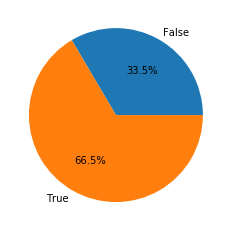

threshold: 0.5


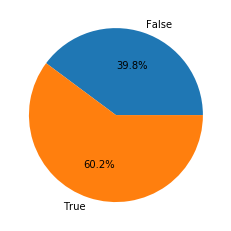

threshold: 0.6


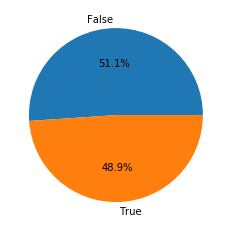

In [14]:
df_result = cosine_sim_df(df_train)
display(df_result.head(3))

for x in thresholds:
    print('threshold:', x)
    cal_correct(df_result, 'cos_sim', x)

In [15]:
x_list = [w for w in df_train['description_x']]
y_list = [w for w in df_train['description_y']]

In [16]:
from difflib import SequenceMatcher

def seq_match(test1, test2):
    return SequenceMatcher(None, test1, test2).ratio()
    
def seq_match_df(df_data):
    col1 = 'description_x'
    col2 = 'description_y'
    df_data[col1] = df_data[col1].str.replace(r'\d', '')
    df_data[col2] = df_data[col2].str.replace(r'\d', '')
    
    df_data['seq_match'] = 0
    df_data['seq_match'] = df_data.apply(
        lambda x: seq_match(x[col1], x[col2]), axis=1)
    
    return df_data

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security,length_x,length_y,cos_sim,cos_sim_predicted,cos_sim_correct,seq_match
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True,30,27,0.431613,False,False,0.807018
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True,35,55,0.527072,False,False,0.666667
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False,28,34,0.580333,False,True,0.806452


threshold: 0.4


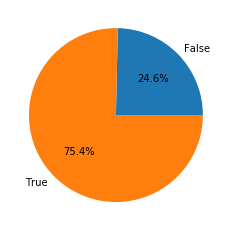

threshold: 0.5


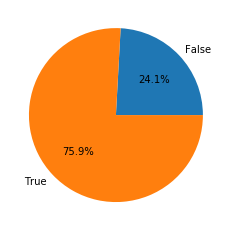

threshold: 0.6


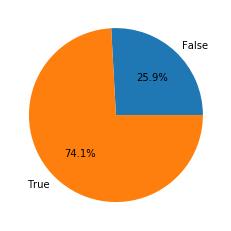

In [17]:
df_result = seq_match_df(df_train)
display(df_result.head(3))

for x in thresholds:
    print('threshold:', x)
    cal_correct(df_result, 'seq_match', x)

,test_id,description_x,description_y,same_security,length_y,seq_match
0,0,first trust dow jones internet,first trust dj internet idx,NaN,27,0.807018
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,NaN,55,0.666667
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,NaN,34,0.806452


([<matplotlib.patches.Wedge at 0x1c5e7973e48>,
 [Text(1.0965563180590878, 0.08697264699143656, 'False'),
  Text(-1.0965563211126996, -0.08697260849130681, 'True')],
 [Text(0.5981216280322296, 0.04743962563169266, '2.5%'),
  Text(-0.5981216296978361, -0.04743960463162189, '97.5%')])

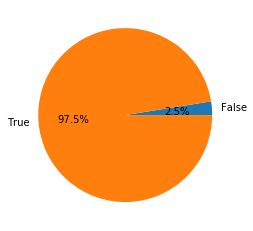

In [18]:
df_result = seq_match_df(df_test )
display(df_result.head(3))

df_result['same_security'] = df_result['seq_match'] > 0.5    
df_group = df_result.groupby('same_security').size().reset_index()
df_group.columns = ['correct', 'cnt']

plt.pie(df_group['cnt'].tolist(), labels=df_group['correct'].tolist(), autopct='%1.1f%%')
plt.show()    

In [19]:
### Alternative Model ###
import gensim
f = x_list
  
data = [] 
  
# iterate through each sentence in the file 
for k in f:    
    for i in sent_tokenize(k): 
        temp = [] 

        # tokenize the sentence into words 
        for j in word_tokenize(i): 
            temp.append(j.lower()) 

        data.append(temp) 
  
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 
model1.train([["hello", "world"]], total_examples=1, epochs=1)
model1.most_similar("vanguard")
  
# Print results 
print(model1.similarity('grade', 'intl')) 
  
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print(model2.similarity('share', 'fund')) 

(1, 2)

C:\Users\Rajit\anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('inc', 0.9940182566642761),
 ('fund', 0.9939579963684082),
 ('com', 0.9938158392906189),
 ('index', 0.9936716556549072),
 ('etf', 0.9936087727546692),
 ('cap', 0.9934399724006653),
 ('fd', 0.9925793409347534),
 ('cl', 0.9925087690353394),
 ('adr', 0.9922949075698853),
 ('corp', 0.9922482371330261)]

C:\Users\Rajit\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


0.97819513
0.99891156


C:\Users\Rajit\anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


In [20]:
import pickle 
from sklearn.externals import joblib
filename_1 = 'model1.pkl'
filename_2 = 'model2.pkl'
joblib.dump(model1,filename_1)
joblib.dump(model2,filename_2)

['model1.pkl']

['model2.pkl']